In [26]:


# System imports
import sys
import os

# Add the parent directory of 'notebooks' to sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Move one level up
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Class/model imports
from data.data_loader import MirDataProcessor
from utils.model_utils import get_device
from solver import Solver

# Package imports
import torch
import torch.optim as optim
import torch.nn as nn

# Select device
device = get_device()
print(f"Device is {device}")

Device is cuda


In [ ]:
# Download and build useable train/test data out of the MIR Billboard dataset
#data_processer = MirDataProcessor(download=True, batch_size=64, dataset_name="guitarset")


INFO: Downloading ['annotations', 'audio_hex_debleeded', 'audio_hex_original', 'audio_mic', 'audio_mix', 'index']. Index is being stored in C:\Users\mattb\miniconda3\envs\amadeus-ex-machina\Lib\site-packages\mirdata\datasets\indexes, and the rest of files in c:\Users\mattb\Documents\CS7643\Final Project\amadeus-ex-machina\data\raw
INFO: [annotations] downloading annotation.zip
37.3MB [00:02, 14.7MB/s]                              
INFO: [audio_hex_debleeded] downloading audio_hex-pickup_debleeded.zip
3.36GB [02:23, 25.2MB/s]                               
INFO: [audio_hex_original] downloading audio_hex-pickup_original.zip
2.99GB [01:59, 26.8MB/s]                               
INFO: [audio_mic] downloading audio_mono-mic.zip
626MB [00:25, 26.1MB/s]                               
INFO: [audio_mix] downloading audio_mono-pickup_mix.zip
652MB [00:25, 26.6MB/s]                               
INFO: [index] downloading guitarset_index_1.1.0.json
248kB [00:00, 385kB/s]                       

In [ ]:
%load_ext autoreload

%autoreload 2

from data.data_loader import MirDataProcessor
data_processer = MirDataProcessor(download=False, batch_size=256, dataset_name="guitarset", process_sequential=True, seq_length=16384)

data_processer.process_wav_data(150)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Found 360 tracks in the dataset.
Processing dataset as sequential data
Processed track 00_BN1-129-Eb_comp and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN1-129-Eb_solo and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN1-147-Gb_comp and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN1-147-Gb_solo and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN2-131-B_comp and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN2-131-B_solo and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN2-166-Ab_comp and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN2-166-Ab_solo and appended data to combined CSV.
Processing datase

In [33]:
# Create data loeaders for train and test set
train_loader, test_loader, num_classes = data_processer.build_data_loaders(None, device)

print(f"Number of classes: {num_classes}")

Preparing model data...
Loading the combined CSV file...
Separating song IDs, features, and labels...
Scaling features using MinMaxScaler...
Encoding labels using LabelEncoder...
Saving the scaler to c:\Users\mattb\Documents\CS7643\Final Project\amadeus-ex-machina\data\processed\scaler.pkl...
Saving the label encoder to c:\Users\mattb\Documents\CS7643\Final Project\amadeus-ex-machina\data\processed\label_encoder.pkl...
Creating sequences of chromagram data within song boundaries...
Splitting data into training and testing sets...
Data preparation complete.
Number of classes determined: 42
Creating TensorDatasets for training and testing data...
Creating DataLoaders for training and testing datasets...
Data loaders are ready for training and testing.
Number of classes: 42


-----------------------------------
Epoch 1
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 3.7834. Validation Loss: 2.6530.
Training Accuracy: 0.0360. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 2
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 3.4471. Validation Loss: 2.6035.
Training Accuracy: 0.0685. Validation Accuracy: 0.4531.
-----------------------------------
Epoch 3
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 3.3319. Validation Loss: 2.9790.
Training Accuracy: 0.1441. Validation Accuracy: 0.1510.
-----------------------------------
Epoch 4
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 3.0248. Validation Loss: 2.9550.
Training Accuracy: 0.1988. Validation Accuracy: 0.0104.
-----------------------------------
Epoch 5
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 2.7299. Validation Loss: 3.1957.
Training Accuracy: 0.3045. Validation Accuracy: 0.0104.
-----------------------------------
Epoch 6
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 2.5469. Validation Loss: 3.8742.
Training Accuracy: 0.3204. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 7
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 2.4048. Validation Loss: 3.4780.
Training Accuracy: 0.3526. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 8
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 2.2354. Validation Loss: 3.2559.
Training Accuracy: 0.3925. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 9
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 2.1762. Validation Loss: 3.3841.
Training Accuracy: 0.4054. Validation Accuracy: 0.1302.
-----------------------------------
Epoch 10
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 2.0682. Validation Loss: 4.1771.
Training Accuracy: 0.4260. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 11
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 2.0525. Validation Loss: 3.8231.
Training Accuracy: 0.4189. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 12
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 2.0031. Validation Loss: 4.5361.
Training Accuracy: 0.4326. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 13
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.9524. Validation Loss: 4.5264.
Training Accuracy: 0.4323. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 14
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.8760. Validation Loss: 4.5860.
Training Accuracy: 0.4629. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 15
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.8506. Validation Loss: 3.8845.
Training Accuracy: 0.4618. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 16
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.8402. Validation Loss: 3.7630.
Training Accuracy: 0.4730. Validation Accuracy: 0.2656.
-----------------------------------
Epoch 17
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.8515. Validation Loss: 3.8525.
Training Accuracy: 0.4631. Validation Accuracy: 0.1406.
-----------------------------------
Epoch 18
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.8017. Validation Loss: 3.4886.
Training Accuracy: 0.4642. Validation Accuracy: 0.1719.
-----------------------------------
Epoch 19
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.7681. Validation Loss: 3.6495.
Training Accuracy: 0.4843. Validation Accuracy: 0.2656.
-----------------------------------
Epoch 20
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.7609. Validation Loss: 3.6009.
Training Accuracy: 0.4956. Validation Accuracy: 0.2083.
-----------------------------------
Epoch 21
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.7587. Validation Loss: 3.4657.
Training Accuracy: 0.4744. Validation Accuracy: 0.2344.
-----------------------------------
Epoch 22
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.7246. Validation Loss: 3.9161.
Training Accuracy: 0.4964. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 23
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.7116. Validation Loss: 4.2948.
Training Accuracy: 0.4970. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 24
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.6216. Validation Loss: 4.3306.
Training Accuracy: 0.5311. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 25
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.5843. Validation Loss: 4.7747.
Training Accuracy: 0.5322. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 26
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.5381. Validation Loss: 4.3461.
Training Accuracy: 0.5484. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 27
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.5756. Validation Loss: 4.2999.
Training Accuracy: 0.5245. Validation Accuracy: 0.0052.
-----------------------------------
Epoch 28
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.4999. Validation Loss: 4.1332.
Training Accuracy: 0.5468. Validation Accuracy: 0.0312.
-----------------------------------
Epoch 29
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.5513. Validation Loss: 3.9252.
Training Accuracy: 0.5338. Validation Accuracy: 0.2188.
-----------------------------------
Epoch 30
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.5265. Validation Loss: 3.8607.
Training Accuracy: 0.5470. Validation Accuracy: 0.1042.
-----------------------------------
Epoch 31
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.4725. Validation Loss: 3.5508.
Training Accuracy: 0.5644. Validation Accuracy: 0.1302.
-----------------------------------
Epoch 32
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.5121. Validation Loss: 3.8139.
Training Accuracy: 0.5451. Validation Accuracy: 0.1458.
-----------------------------------
Epoch 33
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.4887. Validation Loss: 3.9949.
Training Accuracy: 0.5426. Validation Accuracy: 0.0677.
-----------------------------------
Epoch 34
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.5085. Validation Loss: 4.4536.
Training Accuracy: 0.5421. Validation Accuracy: 0.0521.
-----------------------------------
Epoch 35
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.4510. Validation Loss: 4.9114.
Training Accuracy: 0.5589. Validation Accuracy: 0.0052.
-----------------------------------
Epoch 36
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.4717. Validation Loss: 5.4467.
Training Accuracy: 0.5451. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 37
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.5495. Validation Loss: 5.3157.
Training Accuracy: 0.5371. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 38
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.5766. Validation Loss: 4.7521.
Training Accuracy: 0.5311. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 39
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.4970. Validation Loss: 4.5276.
Training Accuracy: 0.5512. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 40
-----------------------------------


Training:   0%|          | 0/15 [00:00<?, ?it/s]

Training Loss: 1.5090. Validation Loss: 4.3706.
Training Accuracy: 0.5435. Validation Accuracy: 0.0000.


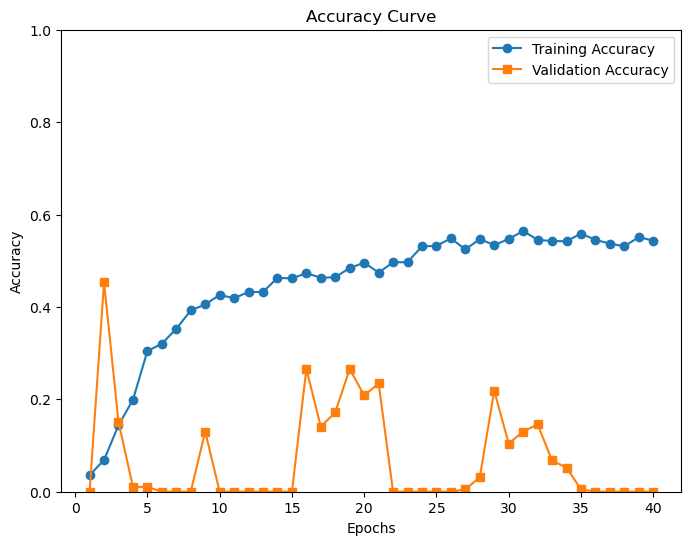

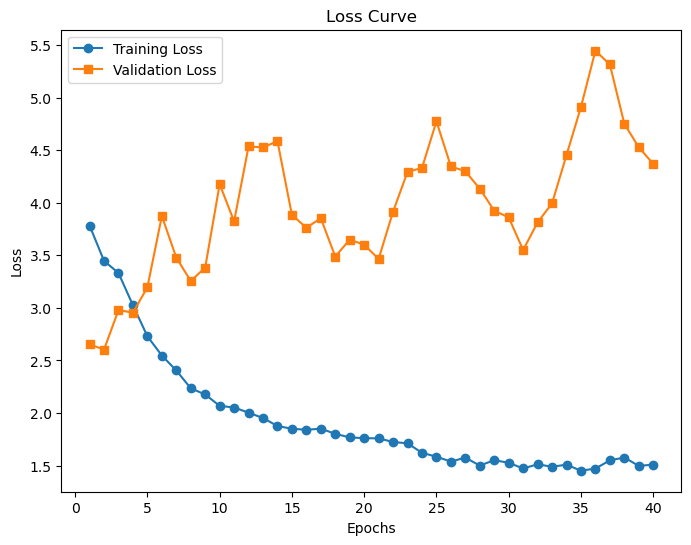

499.874267578125

In [35]:
from models.FourierS2S import FourierS2S

model = FourierS2S(8192, 128, 8192, 256, 512, num_classes, 16384, device)

optimizer = optim.Adam(model.parameters(), lr=0.005)
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.StepLR(optimizer, 20)


# Initialize Solver for CRNNModel
fourierS2S_solver = Solver(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    scheduler=scheduler,
    train_dataloader=train_loader,
    valid_dataloader=test_loader,
    batch_size=256,
    epochs=40,
    device=device,
    early_stop_epochs=5,
    warmup_epochs=2,
    optuna_prune=False
)
fourierS2S_solver.train_and_evaluate(plot_results=True)